In [2]:
%pylab inline

import os
import numpy as np
import pandas as pd
from scipy.misc import imread
from sklearn.metrics import accuracy_score

import tensorflow as tf
import keras

Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


### Load Train and Test Data:

In [3]:
root_dir = os.path.abspath('../..')

# check for existence
print(os.path.exists(root_dir))
print(root_dir)

data_dir = os.path.join(root_dir,'1_Neural_Network_Foundations','Analytics_Vidya_Identify_The_Digits')
print(os.path.exists(data_dir))
print(data_dir)

sub_dir = os.path.join(data_dir,'sub') 
print(os.path.exists(sub_dir))
print(sub_dir)

True
C:\Users\Dinesh\Desktop\Deep-Learning-with-keras
True
C:\Users\Dinesh\Desktop\Deep-Learning-with-keras\1_Neural_Network_Foundations\Analytics_Vidya_Identify_The_Digits
True
C:\Users\Dinesh\Desktop\Deep-Learning-with-keras\1_Neural_Network_Foundations\Analytics_Vidya_Identify_The_Digits\sub


In [4]:

# To stop potential randomness
seed = 128
rng = np.random.RandomState(seed)

In [5]:
train = pd.read_csv(os.path.join(data_dir,'data','Train', 'train.csv'))
test = pd.read_csv(os.path.join('test.csv'))

In [44]:
test.head(n=5)

,filename
0,49000.png
1,49001.png
2,49002.png
3,49003.png
4,49004.png


In [6]:
sample_submission = pd.read_csv(os.path.join('Sample_Submission.csv'))

In [7]:
train.head()

,filename,label
0,0.png,4
1,1.png,9
2,2.png,1
3,3.png,7
4,4.png,3


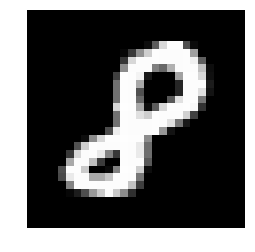

In [94]:
img_name = rng.choice(train.filename)
filepath = os.path.join(data_dir, 'Train', 'Images', 'train', img_name)

img = imread(filepath, flatten=True)

pylab.imshow(img, cmap='gray')
pylab.axis('off')
pylab.show()


In [9]:

temp = []
for img_name in train.filename:
    image_path = os.path.join(data_dir, 'Train', 'Images', 'train', img_name)
    img = imread(image_path, flatten=True)
    img = img.astype('float32')
    temp.append(img)
    
train_x = np.stack(temp)

train_x /= 255.0 
train_x = train_x.reshape(-1, 784).astype('float32')

temp = []
for img_name in test.filename:
    image_path = os.path.join(data_dir, 'Train', 'Images', 'test', img_name)
    img = imread(image_path, flatten=True)
    img = img.astype('float32')
    temp.append(img)
    
test_x = np.stack(temp)

test_x /= 255.0
test_x = test_x.reshape(-1, 784).astype('float32')

train_y = keras.utils.np_utils.to_categorical(train.label.values)

In [20]:
split_size = int(train_x.shape[0]*0.7)

train_x, val_x = train_x[:split_size], train_x[split_size:]
train_y, val_y = train_y[:split_size], train_y[split_size:]

In [11]:
print(train_x)

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [12]:
print(test_x)

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [13]:
print(train_y)

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  1.]
 [ 0.  1.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  1.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]]


In [72]:
print(train_x.shape)

(34300, 784)


In [73]:
print(train_y.shape)

(34300, 10)


In [14]:
# define vars
input_num_units = 784
hidden_num_units = 50
output_num_units = 10

epochs = 5
batch_size = 128

In [15]:
from keras.models import Sequential
from keras.layers import Dense

In [16]:
model = Sequential([
    Dense(output_dim=hidden_num_units, input_dim=input_num_units, activation='relu'),
        
    Dense(output_dim=output_num_units, input_dim=hidden_num_units, activation='softmax'),
])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=784, activation="relu", units=50)`
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=50, activation="softmax", units=10)`
  after removing the cwd from sys.path.


In [17]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


In [21]:

trained_model = model.fit(train_x, train_y, nb_epoch=epochs, batch_size=batch_size, validation_data=(val_x, val_y))

C:\ProgramData\Anaconda3\lib\site-packages\keras\models.py:874: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 34300 samples, validate on 14700 samples
Epoch 1/5
34300/34300 [==============================] - 1s 30us/step - loss: 0.5628 - acc: 0.8508 - val_loss: 0.3146 - val_acc: 0.9129
Epoch 2/5
34300/34300 [==============================] - 1s 24us/step - loss: 0.2633 - acc: 0.9258 - val_loss: 0.2506 - val_acc: 0.9325
Epoch 3/5
34300/34300 [==============================] - 1s 25us/step - loss: 0.2138 - acc: 0.9401 - val_loss: 0.2252 - val_acc: 0.9362
Epoch 4/5
34300/34300 [==============================] - 1s 24us/step - loss: 0.1828 - acc: 0.9467 - val_loss: 0.2022 - val_acc: 0.9431
Epoch 5/5
34300/34300 [==============================] - 1s 24us/step - loss: 0.1602 - acc: 0.9550 - val_loss: 0.1853 - val_acc: 0.9473


In [22]:
pred = model.predict_classes(test_x)

21000/21000 [==============================] - 0s 21us/step


Prediction is:  9


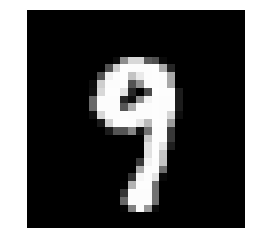

In [24]:

img_name = rng.choice(test.filename)
filepath = os.path.join(data_dir, 'Train', 'Images', 'test', img_name)

img = imread(filepath, flatten=True)

test_index = int(img_name.split('.')[0]) - train.shape[0]

print("Prediction is: ", pred[test_index])

pylab.imshow(img, cmap='gray')
pylab.axis('off')
pylab.show()

In [2]:
sample_submission.filename = test.filename; sample_submission.label = pred

NameError: name 'test' is not defined

In [ ]:
sample_submission.to_csv(os.path.join(sub_dir, 'sub02.csv'), index=False)